In [1]:
import numpy as np
import pandas as pd
import pylsl
import math

In [2]:
# Get list of stream from LSL using pylsl
streams = pylsl.resolve_streams(wait_time=1.0)
print('List of streams:')
for stream in streams:
    print(f'Name: {stream.name()}, Type: {stream.type()}')

List of streams:
Name: BrainAmp BUA -, Type: EEG
Name: LaserMarkerStream, Type: Markers


In [3]:
for stream in streams:
    print(f'Name: {stream.name()}, Type: {stream.type()}')
    print(f'Channel count: {stream.channel_count()}')
    print(f'Sampling rate: {stream.nominal_srate()}')
    print(f'Channel format: {stream.channel_format()}')
    print(f'Version: {stream.version()}')
    print(f'UID: {stream.source_id()}')
    print(f'Created at: {stream.created_at()}')
    print()

Name: BrainAmp BUA -, Type: EEG
Channel count: 80
Sampling rate: 250.0
Channel format: 1
Version: 110
UID: BrainAmp_BUA_-_SR-250
Created at: 8043.8380118

Name: LaserMarkerStream, Type: Markers
Channel count: 1
Sampling rate: 0.0
Channel format: 3
Version: 110
UID: CharacterEvent
Created at: 4240.9558303



In [4]:
eeg_stream = pylsl.resolve_byprop('type', 'EEG', timeout=1.0)[0]
print(f'Name: {eeg_stream.name()}, Type: {eeg_stream.type()}')
marker_stream = pylsl.resolve_byprop('type', 'Markers', timeout=1.0)[0]
print(f'Name: {marker_stream.name()}, Type: {marker_stream.type()}')

Name: BrainAmp BUA -, Type: EEG
Name: LaserMarkerStream, Type: Markers


In [5]:
# Access the metadata to fetch channel labels
channelInlet = pylsl.StreamInlet(eeg_stream)
channelInlet = channelInlet.info()
channels = channelInlet.desc().child("channels").child("channel")
channel_labels = []  # List to store channel labels

# Retrieve the channel labels and store them
for ch_index in range(channelInlet.channel_count()):
    # Add the label to the list
    channel_labels.append(channels.child_value("label"))

    # Move to the next sibling channel
    channels = channels.next_sibling("channel")

In [6]:
# Record EEG data for 3 seconds and save them as a pandas dataframe column names should be the channel labels
# Create an inlet to receive data
eeg_inlet = pylsl.StreamInlet(eeg_stream)
marker_inlet = pylsl.StreamInlet(marker_stream)

plot_duration = 1  # Duration of the plot in seconds

info = eeg_inlet.info() 
bufsize = (
    2 * math.ceil(info.nominal_srate() * plot_duration),
    info.channel_count(),
)

dtypes = [[], np.float32, np.float64, None, np.int32, np.int16, np.int8, np.int64]
buffer = np.empty(bufsize, dtype=dtypes[info.channel_format()])

print(bufsize)
print(buffer.shape)






(500, 80)
(500, 80)


In [7]:
# Initialize an empty list to store the data
timestamps = []
samples = []

# Receive data until the end time
end_time = pylsl.local_clock() + 3
while pylsl.local_clock() < end_time:
    # Get a new sample
    sample, timestamp = eeg_inlet.pull_chunk(timeout=0.0, max_samples=1000)
    sample = np.array(sample).reshape(-1, 80)
    timestamp = np.array(timestamp)
    
    samples.append(sample)
    timestamps.append(timestamp)

samples = np.vstack(samples)
timestamps = np.hstack(timestamps)

print(samples.shape)
print(timestamps.shape)

(748, 80)
(748,)


In [8]:
df_timestamps = pd.DataFrame(timestamps, columns=['timestamps'])
df_samples = pd.DataFrame(samples, columns=channel_labels)
df_samples = pd.concat([df_timestamps, df_samples], axis=1)



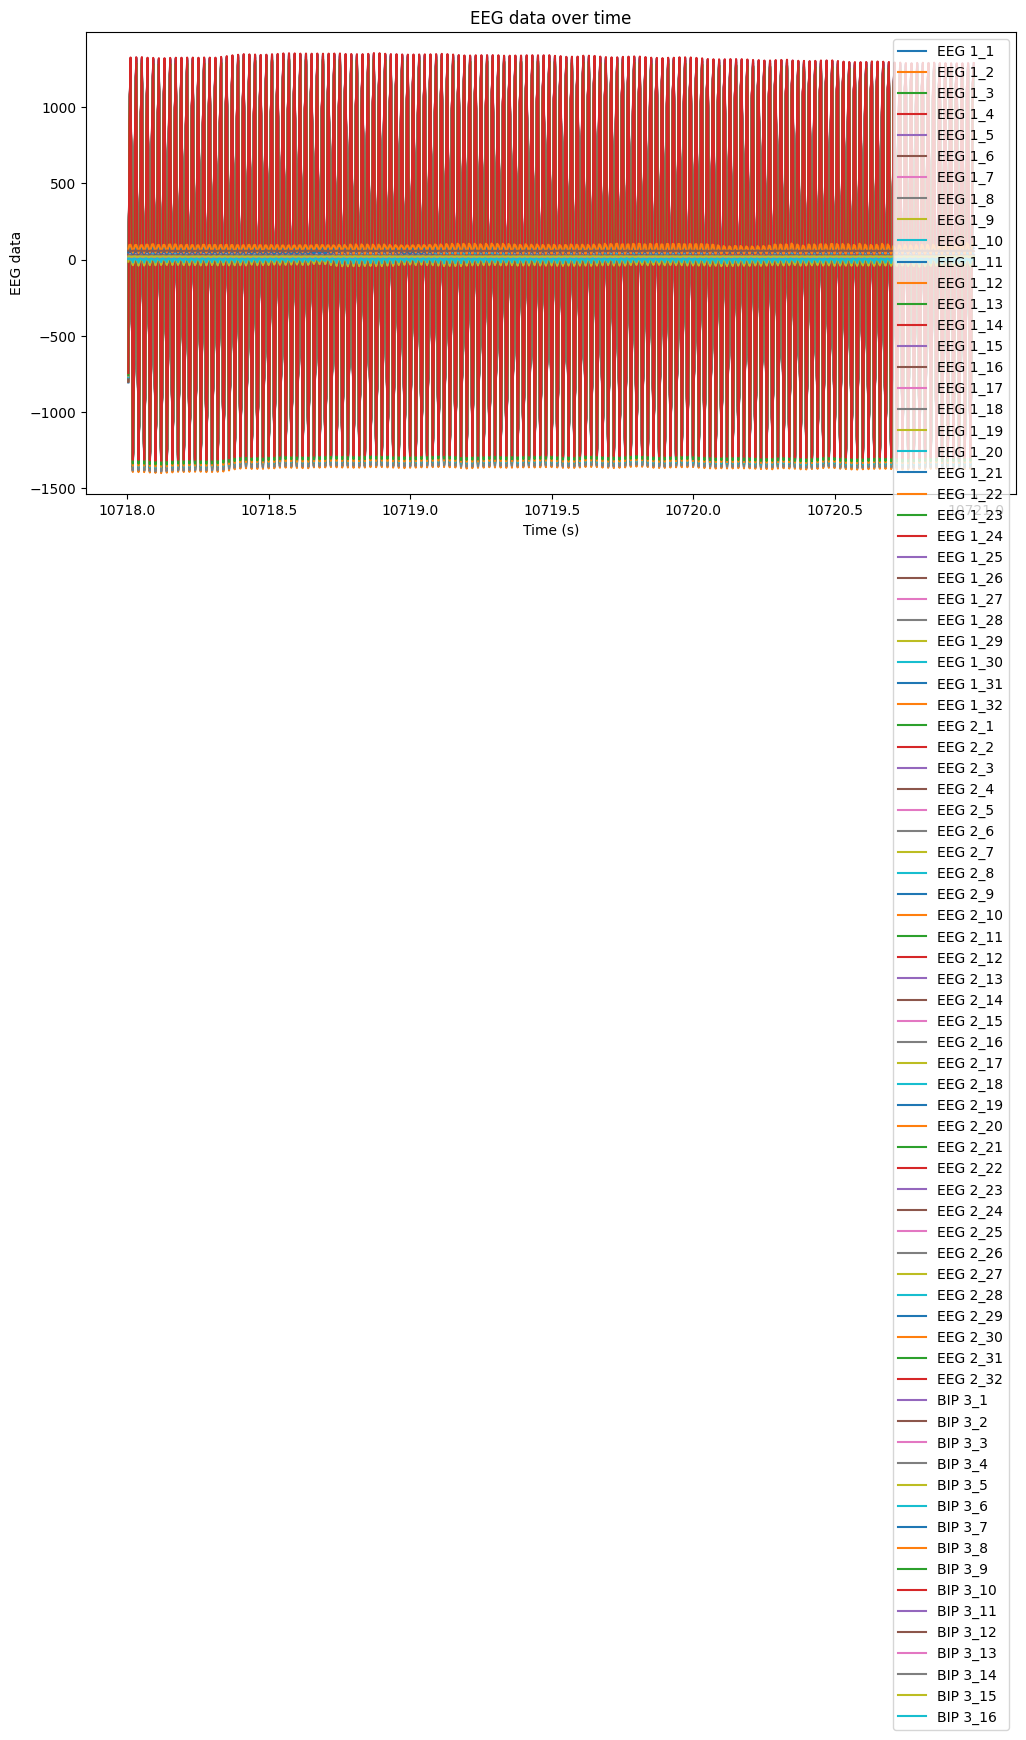

In [9]:
# Plot df_samples using matplotlib
import matplotlib.pyplot as plt

# Plot the data
plt.figure(figsize=(12, 6))
for channel in channel_labels:
    plt.plot(df_samples['timestamps'], df_samples[channel], label=channel)
plt.xlabel('Time (s)')
plt.ylabel('EEG data')
plt.title('EEG data over time')
plt.legend()
plt.show()


In [10]:



markers = np.array(markers)
df_marker_timestamps = pd.DataFrame(marker_timestamps, columns=['timestamps'])
df_markers = pd.DataFrame(markers, columns=['markers'])
df_markers = pd.concat([df_marker_timestamps, df_markers], axis=1)

df = pd.merge_asof(df_samples, df_markers, on='timestamps')
df.head()

# Use only channels from EEG1_1 to EEG1_8 and plot the data
import matplotlib.pyplot as plt
selected_channels = [f'EEG 1_{i}' for i in range(1, 9)]
df[selected_channels].plot(subplots=True, figsize=(10, 10))

# Plot the markers
plt.figure()
plt.plot(df['timestamps'], df['markers'], 'o')
plt.xlabel('Time (s)')
plt.ylabel('Marker')
plt.title('Markers')

plt.show()


NameError: name 'markers' is not defined

In [ ]:
df_samples.shape

In [ ]:
df_markers.shape

In [ ]:
# Record EEG data for 3 seconds and save them as a pandas dataframe column names should be the channel labels
# Create an inlet to receive data
marker_inlet = pylsl.StreamInlet(marker_stream)

# Initialize an empty list to store the data
samples = []
timestamps = []

# Get the current time and the end time
start_time = pylsl.local_clock()
end_time = start_time + 3

# Receive data until the end time
while pylsl.local_clock() < end_time:
    # Get a new sample
    sample, timestamp = inlet.pull_sample()
    samples.append(sample)
    timestamps.append(timestamp)
    
# Convert the data to a numpy array
data = np.array(samples)

# Create a pandas dataframe
import pandas as pd

df_timestamps = pd.DataFrame(timestamps, columns=['timestamps'])
df_data = pd.DataFrame(data, columns=channel_labels)
df = pd.concat([df_timestamps, df_data], axis=1)
df.head()


In [ ]:
info.nominal